In [1]:
def plot_cat_var(labels, sizes, title, num_values):
    
    #distribution_size = data[column].shape[0]
    if num_values > 10:
        labels = labels[:10]
        sizes = sizes[:10]
    else:
        labels = labels[:num_values]
        sizes = sizes[:num_values]
        
    sns.set(font_scale=2)
    ax = sns.barplot(x=labels, y=sizes)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(title)
    ax.set_ylabel('count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.figure(figsize=(20,10))
    #plt.savefig(title)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [3]:
data = pd.read_csv('small_data.csv')

In [4]:
data.shape

(500000, 24)

In [5]:
column_num_missing_vals = [(column,data[column].isna().sum()) for column in data.columns if data[column].isna().sum() > 0]
columns = [i[0] for i in column_num_missing_vals]
num_missing = [i[1] for i in column_num_missing_vals]

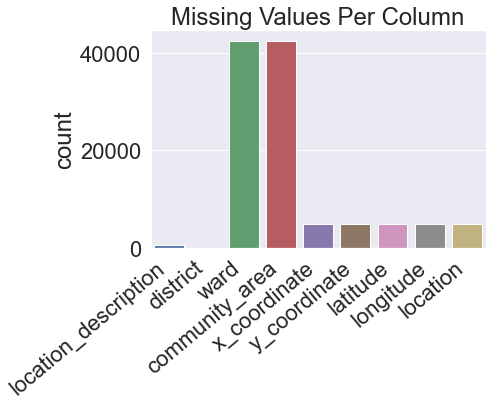

<Figure size 1440x720 with 0 Axes>

In [6]:
plot_cat_var(columns, num_missing, 'Missing Values Per Column', len(columns))


In [8]:
data.dtypes

Unnamed: 0                int64
Unnamed: 0.1              int64
unique_key                int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                      int64
district                float64
ward                    float64
community_area          float64
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
dtype: object

In [ ]:
# convert to category first, then string

In [19]:
data.district = data.district.astype('object')
data.beat = data.beat.astype('object')
data.ward = data.ward.astype('object')
data.community_area = data.community_area.astype('object')

In [20]:
data.dtypes

Unnamed: 0                int64
Unnamed: 0.1              int64
unique_key                int64
case_number              object
date                     object
block                    object
iucr                     object
primary_type             object
description              object
location_description     object
arrest                     bool
domestic                   bool
beat                     object
district                 object
ward                     object
community_area           object
fbi_code                 object
x_coordinate            float64
y_coordinate            float64
year                      int64
updated_on               object
latitude                float64
longitude               float64
location                 object
dtype: object

In [26]:
def fill(val, fill_in):
    
    if pd.isnull(val):
        return fill_in
    else:
        return val

In [27]:
data.location_description.value_counts()

STREET                                             129784
RESIDENCE                                           84848
APARTMENT                                           53424
SIDEWALK                                            48540
OTHER                                               18758
                                                    ...  
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS         1
OFFICE                                                  1
SEWER                                                   1
BARBER SHOP/BEAUTY SALON                                1
CHA STAIRWELL                                           1
Name: location_description, Length: 169, dtype: int64

In [28]:
data['location_description'] = data['location_description'].apply(fill, fill_in='STREET')

In [30]:
data['district'] = data['district'].apply(fill, fill_in=8.0)

In [42]:
data.district.value_counts()

8.0     33658
11.0    32309
7.0     29470
6.0     28919
25.0    28499
4.0     28329
3.0     25546
9.0     24947
12.0    24592
2.0     23707
18.0    22339
5.0     22260
19.0    22212
15.0    21745
10.0    21451
1.0     19786
14.0    19396
16.0    16712
22.0    16109
24.0    15049
17.0    14262
20.0     8691
31.0       12
Name: district, dtype: int64

In [43]:
district_8 = data.groupby('district').get_group(8.0)

In [47]:
district_8_wards = dict()
district_8_wards[15.0] = 1000

In [56]:
counts = list(data.ward.value_counts())
wards = list(data.ward.value_counts().index)
print(len(counts))
print(len(wards))
for i in range(0, len(counts)):
    print(f"Ward Name: {wards[i]} Percentage: {100*round(float(counts[i]/data.shape[0]),2)}%")
#plot_cat_var(data.ward.index, counts, 'Ward Frequency', len(data.ward.index))

50
50
Ward Name: 28.0 Percentage: 4.0%
Ward Name: 42.0 Percentage: 4.0%
Ward Name: 24.0 Percentage: 4.0%
Ward Name: 2.0 Percentage: 3.0%
Ward Name: 27.0 Percentage: 3.0%
Ward Name: 17.0 Percentage: 3.0%
Ward Name: 20.0 Percentage: 3.0%
Ward Name: 6.0 Percentage: 3.0%
Ward Name: 3.0 Percentage: 3.0%
Ward Name: 21.0 Percentage: 3.0%
Ward Name: 16.0 Percentage: 3.0%
Ward Name: 34.0 Percentage: 3.0%
Ward Name: 8.0 Percentage: 3.0%
Ward Name: 37.0 Percentage: 3.0%
Ward Name: 15.0 Percentage: 2.0%
Ward Name: 7.0 Percentage: 2.0%
Ward Name: 9.0 Percentage: 2.0%
Ward Name: 5.0 Percentage: 2.0%
Ward Name: 29.0 Percentage: 2.0%
Ward Name: 4.0 Percentage: 2.0%
Ward Name: 1.0 Percentage: 2.0%
Ward Name: 26.0 Percentage: 2.0%
Ward Name: 10.0 Percentage: 2.0%
Ward Name: 32.0 Percentage: 2.0%
Ward Name: 18.0 Percentage: 2.0%
Ward Name: 49.0 Percentage: 1.0%
Ward Name: 25.0 Percentage: 1.0%
Ward Name: 31.0 Percentage: 1.0%
Ward Name: 44.0 Percentage: 1.0%
Ward Name: 11.0 Percentage: 1.0%
Ward Name: 30

In [57]:
import random

In [60]:
x = list(data.ward)

for i in range(0, len(x)):
    if pd.isnull(x[i]):
        r = random.randint(0,2)
        if r == 0:
            x[i] = 28.0
        elif r == 1:
            x[i] = 42.0
        else:
            x[i] = 24.0
            
data['ward'] = x

In [63]:
counts = list(data.community_area.value_counts())
values = list(data.community_area.value_counts().index)
print(len(counts))
print(len(values))
for i in range(0, len(counts)):
    print(f"Value Name: {values[i]} Percentage: {100*round(float(counts[i]/data.shape[0]),2)}%")
#plot_cat_var(data.ward.index, counts, 'Ward Frequency', len(data.ward.index))

78
78
Value Name: 25.0 Percentage: 6.0%
Value Name: 8.0 Percentage: 3.0%
Value Name: 43.0 Percentage: 3.0%
Value Name: 23.0 Percentage: 3.0%
Value Name: 28.0 Percentage: 3.0%
Value Name: 24.0 Percentage: 3.0%
Value Name: 67.0 Percentage: 3.0%
Value Name: 29.0 Percentage: 3.0%
Value Name: 71.0 Percentage: 3.0%
Value Name: 49.0 Percentage: 2.0%
Value Name: 68.0 Percentage: 2.0%
Value Name: 69.0 Percentage: 2.0%
Value Name: 66.0 Percentage: 2.0%
Value Name: 32.0 Percentage: 2.0%
Value Name: 44.0 Percentage: 2.0%
Value Name: 22.0 Percentage: 2.0%
Value Name: 61.0 Percentage: 2.0%
Value Name: 6.0 Percentage: 2.0%
Value Name: 26.0 Percentage: 2.0%
Value Name: 27.0 Percentage: 2.0%
Value Name: 46.0 Percentage: 2.0%
Value Name: 19.0 Percentage: 2.0%
Value Name: 30.0 Percentage: 2.0%
Value Name: 53.0 Percentage: 2.0%
Value Name: 42.0 Percentage: 1.0%
Value Name: 7.0 Percentage: 1.0%
Value Name: 1.0 Percentage: 1.0%
Value Name: 3.0 Percentage: 1.0%
Value Name: 38.0 Percentage: 1.0%
Value Name: 1

In [72]:
data['community_area'] = data['community_area'].apply(fill, fill_in=25.0)

In [73]:
data.community_area.value_counts()[25.0]

71417

In [74]:
data.isna().sum()

Unnamed: 0                 0
Unnamed: 0.1               0
unique_key                 0
case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description       0
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       0
community_area             0
fbi_code                   0
x_coordinate            4900
y_coordinate            4900
year                       0
updated_on                 0
latitude                4900
longitude               4900
location                4900
dtype: int64

In [75]:
data.to_csv('data.csv',index=False)

In [68]:
data.community_area.value_counts()

25.0    29004
8.0     15963
43.0    15252
23.0    14479
28.0    13650
        ...  
36.0     1000
12.0      806
47.0      644
9.0       471
0.0         4
Name: community_area, Length: 78, dtype: int64

In [ ]:
28.0 Percentage: 4.0%
Ward Name: 42.0 Percentage: 4.0%
Ward Name: 24.0 Percentage: 4.0%

In [44]:
'''
Every police ward is going to be in a 
'''
#district_8.ward.value_counts()

15.0    6859
23.0    5912
18.0    5778
13.0    5678
14.0    3454
16.0    2304
17.0     824
22.0      73
7.0        8
42.0       1
29.0       1
12.0       1
Name: ward, dtype: int64

In [41]:
district_4.ward.value_counts()

7.0     10622
10.0     7633
8.0      7397
5.0       539
Name: ward, dtype: int64

In [ ]:
dat

In [34]:
data.ward.value_counts()

28.0    21019
42.0    18862
24.0    18000
2.0     16956
27.0    16924
17.0    15300
20.0    15059
6.0     14864
3.0     13981
21.0    13652
16.0    13226
34.0    12852
8.0     12547
37.0    12507
15.0    12375
7.0     12355
9.0     11673
5.0     11020
29.0    10703
4.0      8861
1.0      8802
26.0     7733
10.0     7711
32.0     7669
18.0     7549
49.0     6567
25.0     6552
31.0     6308
44.0     6306
11.0     6282
30.0     6280
14.0     6191
46.0     6076
35.0     5980
23.0     5913
43.0     5775
13.0     5678
12.0     5536
22.0     5264
41.0     4872
47.0     4815
40.0     4804
36.0     4738
38.0     4728
45.0     4705
50.0     4636
33.0     4551
48.0     4525
39.0     4184
19.0     4058
Name: ward, dtype: int64

In [35]:
data.ward.isna().sum()

42476

In [ ]:
x = list(data.ward)
for i in range(0, len(x)):
    if pd.isnull(x[i]):
        r = random.randint(0,7)
        if r == 0 or r == 1:
            x[i] = '8.0'
        elif r == 2 or r == 3:
            x[i] = '11.0'
        elif r == 4:
            x[i] = '7.0'
        elif r == 5:
            x[i] = '6.0'
        elif r == 6:
            x[i] = '25.0'
        else:
            x[i] = '4.0'

In [59]:
data.district.value_counts()

8.0     33656
11.0    32309
7.0     29470
6.0     28919
25.0    28499
4.0     28329
3.0     25546
9.0     24947
12.0    24592
2.0     23707
18.0    22339
5.0     22260
19.0    22212
15.0    21745
10.0    21451
1.0     19786
14.0    19396
16.0    16712
22.0    16109
24.0    15049
17.0    14262
20.0     8691
31.0       12
Name: district, dtype: Int64

In [61]:
import random

In [ ]:
data.district.isna().sum()

In [51]:
data.location_description.isna().sum()

0

In [ ]:
data.year.value_counts()

In [ ]:
data.district = [str(int(district)) for district in data.district]
data.beat = [str(int(beat)) for beat in data.beat]
data.community_area = [str(int(community_area)) for community_area in data.community_area]
data.ward = [str(int(ward)) for ward in data.ward]

#str(int(data.district[0]))